In [1]:
import altair as alt
import pandas as pd

from altair import datum
import altair.vegalite.v3 as v3

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/kai-wren/UCU_DataViz/master/rate.csv')
# df = pd.read_csv('rate.csv')
df.head()

,region,year,rate
0,Crimea,1990,2.5
1,Vinnytsia,1990,-2.1
2,Volyn,1990,4.0
3,Dnipropetrovsk,1990,0.5
4,Donetsk,1990,-1.2


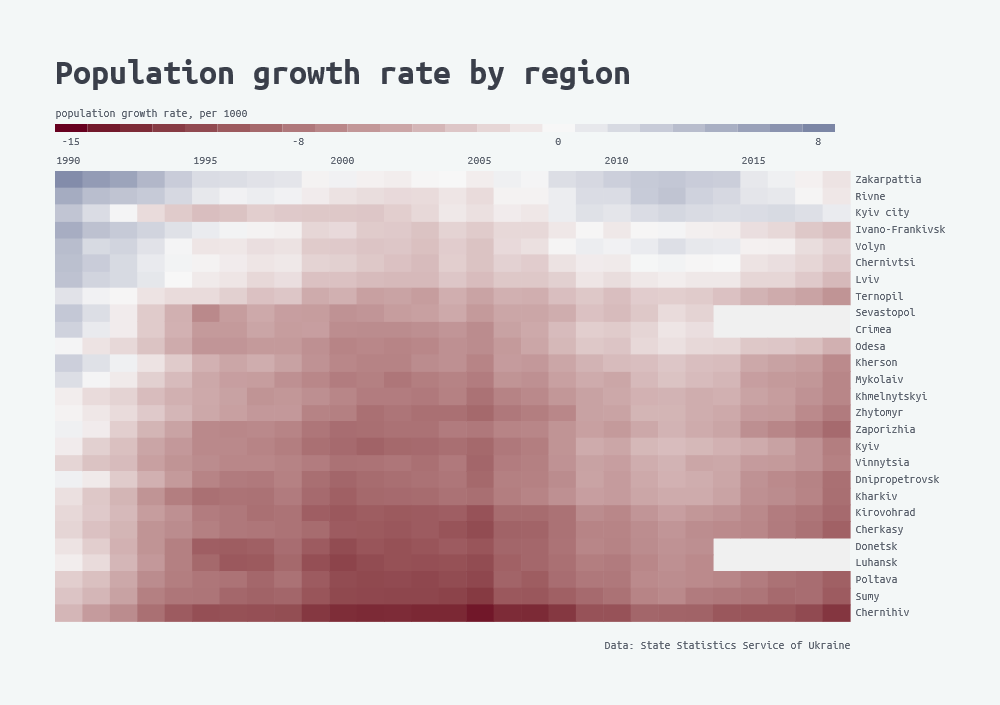

In [46]:
source = pd.DataFrame({
    'num': [-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
})

legend = alt.Chart(source).mark_rect().encode(
    x=alt.X('num:O', 
        axis=alt.Axis(values=[-15, -8, 0, 8], orient ='bottom', titleAnchor='start', titleY=-25, labelBaseline='top',
                     labelPadding=3),
        title='population growth rate, per 1000'),
    color=alt.Color('num:Q',
                    scale=alt.Scale(range=['#67001f', '#f7f7f7', '#053061'], domain=[-15, 0, 15]),
                   legend=None)
).properties(width=780, height=8, title='Population growth rate by region')

heat_map = alt.Chart(df).mark_rect(width=28, height=17.5).encode(
    x=alt.X('year:O', 
            axis=alt.Axis(values=[1990, 1995, 2000, 2005, 2010, 2015], 
                          title='Data: State Statistics Service of Ukraine', 
                          titleY=480, titleAnchor='end') 
           ),
    y=alt.Y('region:O', sort=alt.EncodingSortField(field="rate", op="mean", order="descending"), axis=alt.Axis(title=None)),
    color=alt.Color('rate:Q', scale=alt.Scale(range=['#67001f', '#f7f7f7', '#053061'], domain=[-15, 0, 15], padding=0, 
                                             paddingInner=0, paddingOuter=0, ),
                    title='population growth rate per 1000', legend=None)
).properties(width=795, height=450)




alt.vconcat(
    legend,
    heat_map, spacing=7
).configure( background='#F3F7F7', padding=55, 
            title=alt.TitleConfig(anchor='start', color='#3A3F4A', fontSize=36, font='Ubuntu Mono', fontWeight=900, 
                                  dy=-10),
).configure_axisY(orient='right', ticks=False, labelFont='Ubuntu Mono', labelFontSize=12, labelColor='#5D646F',
                  labelPadding=5, domain=False, labelFontWeight=200
).configure_axisX(orient='top', labelAngle = 0, labelFont='Ubuntu Mono', labelFontSize=12, labelColor='#5D646F',
                  labelPadding=17, ticks=False, titleColor='#5D646F', titleFont='Ubuntu Mono', titleFontSize=12,
                  domain=False, grid=False, titleFontWeight=200, labelFontWeight=200
).configure_view(stroke=None, fill=alt.Value('#f0f0f0')
)


